**Sales data Analysis**

*OBJECTIVES:*
* importing zipdata and creating a dataframe
* figuring out optimal data visualization formats to visualize data
* Applying Data Visualization
* Creating interactive dashboard or tables and charts to better explain dataset

In [146]:
import pandas as pd
import matplotlib.pyplot as plt  # Corrected import statement
import numpy as np
import seaborn as sns

Sales_data = pd.read_csv('/content/Sales data/retail_sales_dataset.csv')

In [147]:
Sales_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Checking for null values

In [148]:
Sales_data.isna().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


Table has no null values so we can move ahead to data visualization

**Checking what category of product sells the most**

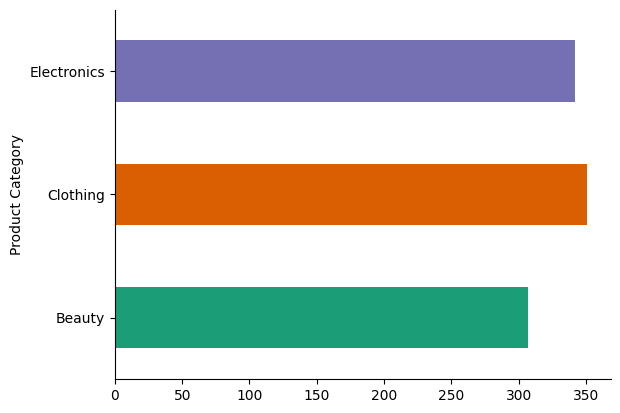

In [149]:
Sales_data.groupby('Product Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Checking Which Gender Buys the most products**

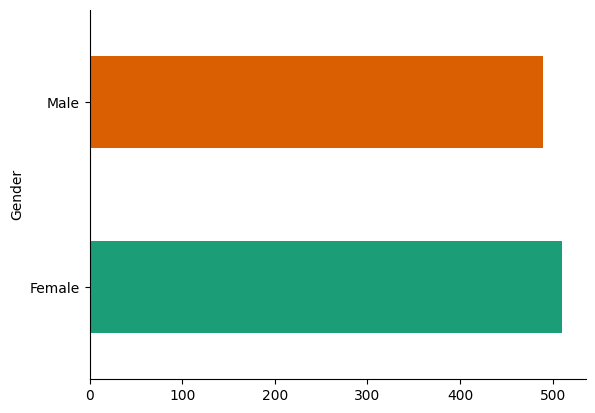

In [150]:
Sales_data.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Mapping Sales product category for each Gender**

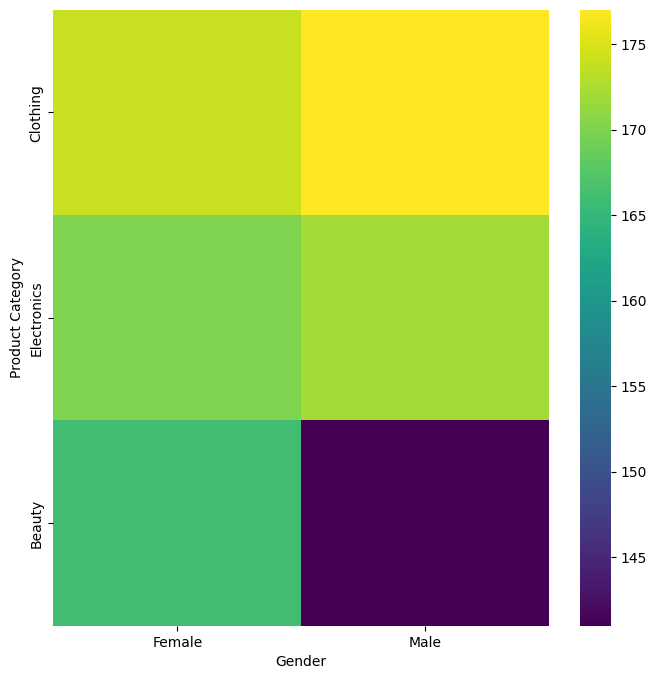

In [151]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Product Category'].value_counts()
    for x_label, grp in Sales_data.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Product Category')

**Age vs Buying Frequency**

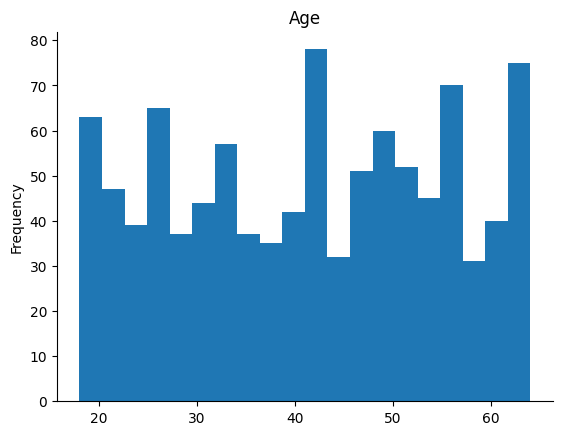

In [152]:
Sales_data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

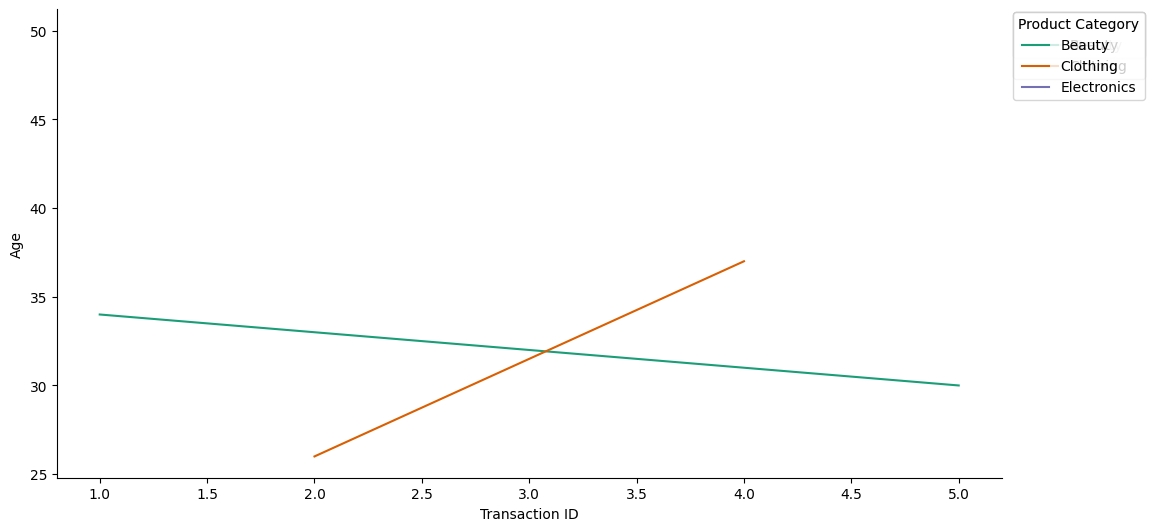

In [153]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction ID']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('Transaction ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction ID')
_ = plt.ylabel('Age')

**Price per Unit of Products**

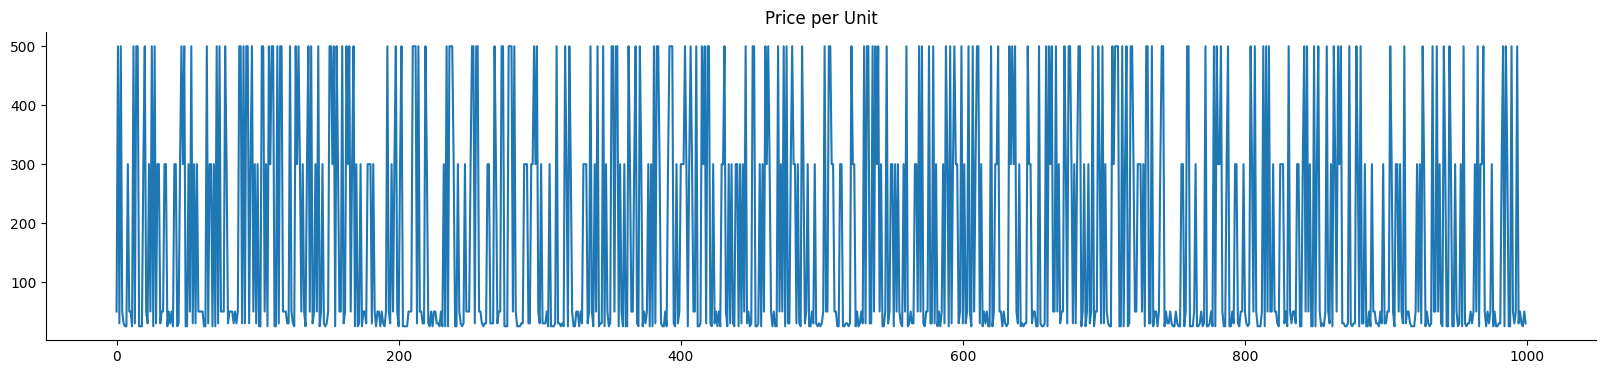

In [154]:
Sales_data['Price per Unit'].plot(kind='line', figsize=(20, 4), title='Price per Unit')
plt.gca().spines[['top', 'right']].set_visible(False)

**Gender Vs Transaction ID**

<ipython-input-155-25025927d693>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_52, x='Transaction ID', y='Gender', inner='stick', palette='Dark2')


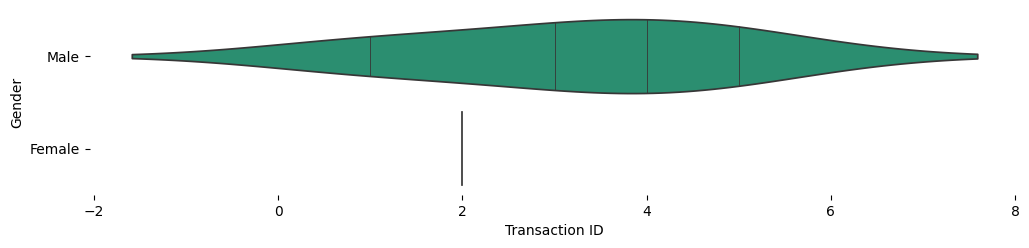

In [155]:
figsize = (12, 1.2 * len(_df_52['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='Transaction ID', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Transaction ID vs Product Category**

<ipython-input-156-89f27e2f743b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_53, x='Transaction ID', y='Product Category', inner='stick', palette='Dark2')


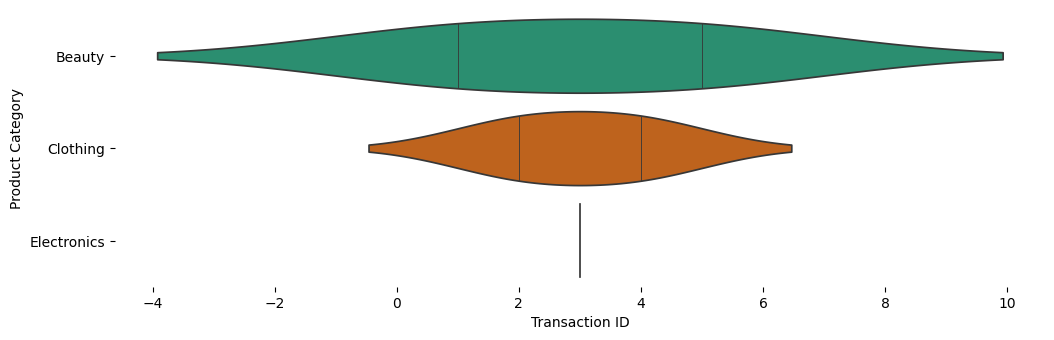

In [156]:
figsize = (12, 1.2 * len(_df_53['Product Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='Transaction ID', y='Product Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Age vs Quantity Plot**

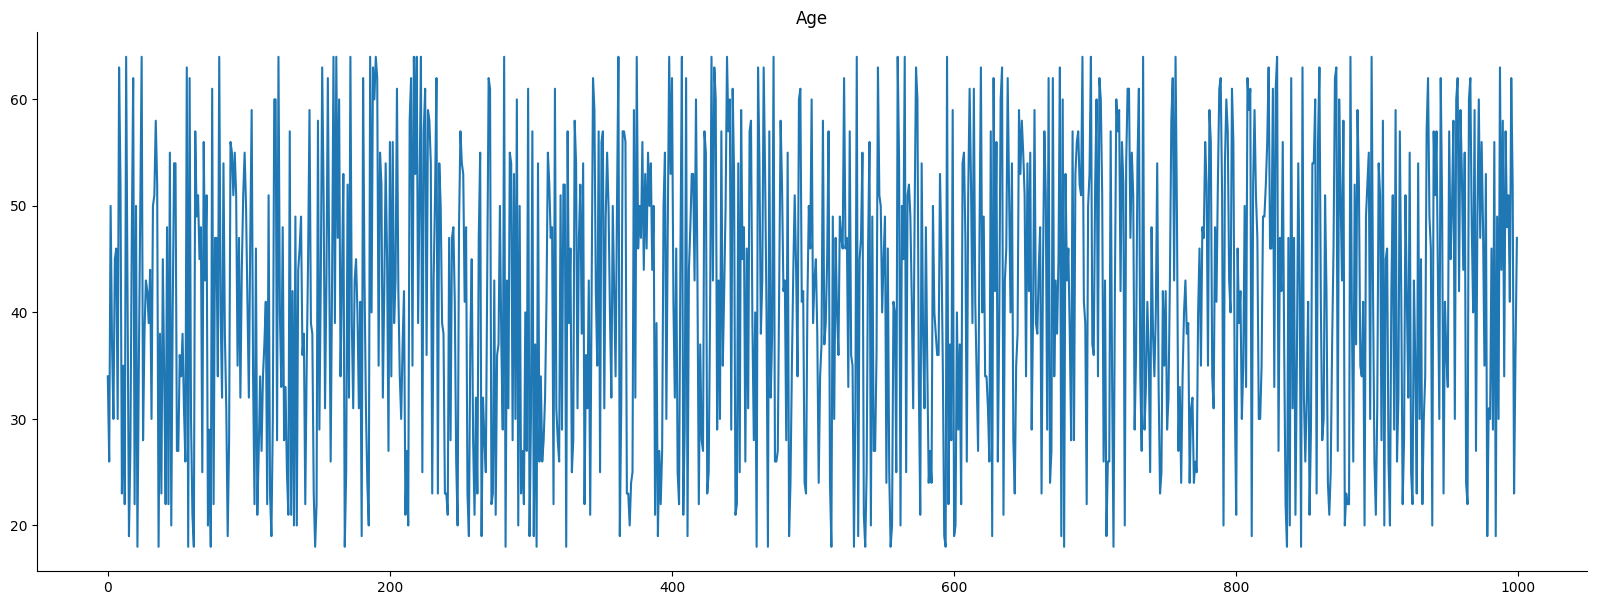

In [157]:
from matplotlib import pyplot as plt
Sales_data['Age'].plot(kind='line', figsize=(20, 7), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

**TRANSACTION ID VS AGE**



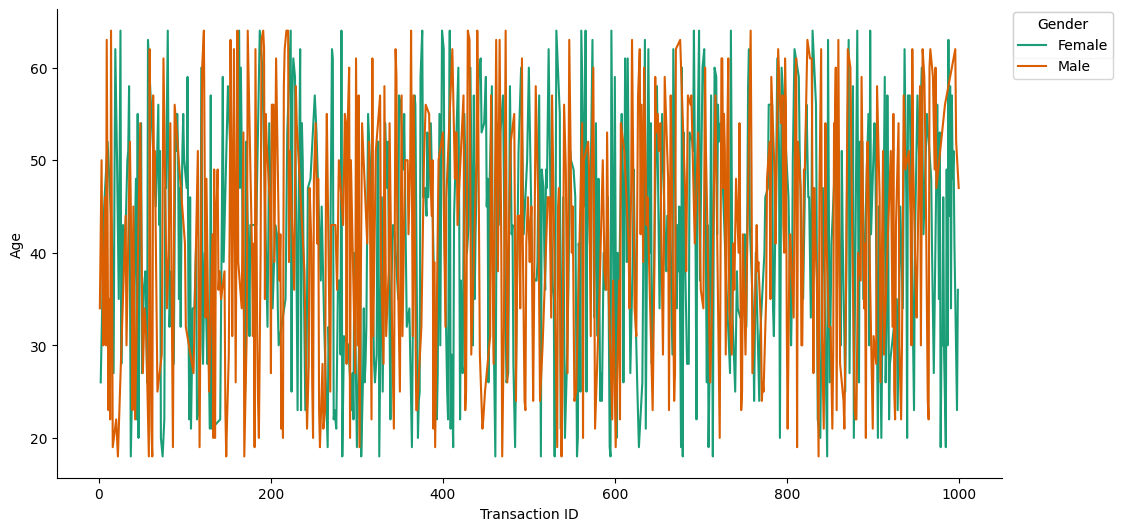

In [158]:
# @title Transaction ID vs Age

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction ID']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Sales_data.sort_values('Transaction ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction ID')
_ = plt.ylabel('Age')